Let's generate N discrete time series, each consisting of T observations of a random variable X.

First, we load the necessary Python packages.
                    

In [1]:
# Check python version
import sys
print("Python is:", sys.version)

# Import matplotlib and numpy
import matplotlib
import matplotlib.pyplot as plt
print("Matplotlib is:", matplotlib.__version__)

import numpy as np
print("Numpy is:", np.__version__)

# import random
from scipy.stats import norm
from scipy.stats import t
# from scipy.stats import triang

Python is: 3.7.6 (default, Jan  8 2020, 20:23:39) [MSC v.1916 64 bit (AMD64)]
Matplotlib is: 3.1.3
Numpy is: 1.18.1


Next, we generate the series of random numbers. $N$ is the number of different series, and $T$ specifies how many observation we have in each series.

We also set the range of the distribution we will consider [x_min, x_max], and the number of bins, n_bins, into which we will split this range.

Feel free to edit the code to:

1. choose a distribution (from Gaussian, Student t, and Triangular);

2. change the distribution's parameters; and

3. generate different random variables by changing the random seed.

In [2]:
# number and length of time series
N=1000
T=100

# histogram parameters
x_min=-20
x_max=20
n_bins=100
bin_width=(x_max-x_min)/n_bins

# choose a distribution

# normal distribution
l = 0 # location
s = 2 # scale
dist = norm(loc=l, scale=s)

# t distribution
# df = 1.5 # shape
# l = 0 # location
# s = 1 # scale
# dist = t(df, loc=l, scale=s)

# triangular distribution
# c = 0.5 # shape (centre)
# l = x_min # location
# s = x_max-x_min # scale
# dist = triang(c, loc=l, scale=s)

# generate random variables
seed = np.random.RandomState(10000) # random seed
X=dist.rvs(size=[N,T], random_state=seed)

Next, we:

1. count observations in each bin, for each of the N time series, yielding N histograms;

2. estimate the uncertainty in the bin counts as the standard deviation across all time series;

3. construct the decision weight density $w$ by adding the uncertainty to each count, dividing by the total observations, and normalising;

4. construct the CDF of the decision weights; and

5. find the CDF of the reference distribution we used to generate the data.

In [3]:
# count
n=np.empty((N,n_bins))
for series in range(0,N):
    n[series][:]=np.histogram(X[series][:],bins=n_bins,range=(x_min,x_max))[0]
    x_bins=np.histogram(X[series][:],bins=n_bins,range=(x_min,x_max))[1] # bin edges
x_l=x_bins[:-1] # left edges
x_r=x_bins[1:] # right edges
x_bin_c=(x_l+x_r)/2 # bin centres

# find DM's count, mean count, and uncertainty
dm_count=n[0] # DM's count
mean_count=np.mean(n,0)# sample mean count across DMs
uncertainty=np.std(n,0) # uncertainty in count
count=dm_count # decide which count to use

# construct decision weights and normalize
phat=count/(T*bin_width) # estimated density
wraw=phat+uncertainty/(T*bin_width) # unnormalised decision weight
wmass=np.sum(wraw)*bin_width # unnormalised mass
w=wraw/wmass # normalised decision weight density

# find decision weight CDF
Fw=np.cumsum(w)*bin_width

# find reference CDF
Fp=dist.cdf(x_bins) # all bin edges
Fp=(Fp-Fp[0])/(Fp[-1]-Fp[0]) # normalise Fp over truncated range
Fw=np.concatenate(([0],Fw)) # add left bin edge to Fw

Finally, to display the resulting ``probability weighting,'' we plot:

1. the estimated PDF with and without the uncertainty added (left); and

2. the CDF mappings for the reference and estimated CDFs (right).

Do we recover the inverse-S curve?

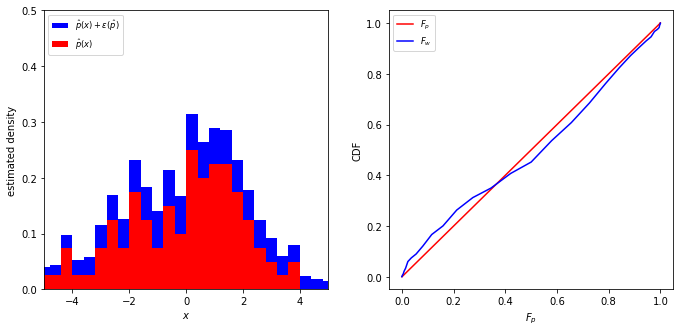

In [4]:
# plot
# define figure and axes
fig, axes = plt.subplots(1, 2, figsize=(10,5))
fig.tight_layout(pad=3)
axes[0].hist(x_l, x_bins, weights=wraw, color='b', label='$\hat{p}(x)+\epsilon(\hat{p})$')
axes[0].hist(x_l, x_bins, weights=phat, color='r', label='$\hat{p}(x)$')
axes[0].set_xlim((-5,5))
axes[0].set_ylim((0,0.5))
axes[0].set_xlabel('$x$')
axes[0].set_ylabel('estimated density')
axes[0].legend(loc='upper left',fontsize='small')
axes[1].plot(Fp,Fp,'r',label='$F_p$')
axes[1].plot(Fp,Fw,'b',label='$F_w$')
axes[1].set_xlabel('$F_p$')
axes[1].set_ylabel('CDF')
axes[1].legend(loc='upper left',fontsize='small')

plt.show()